<a href="https://colab.research.google.com/github/MihailMV/Fruits-and-vegetables/blob/master/NN_Fresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.style
import os

matplotlib.style.use('ggplot')

In [0]:
bad_files = [
'apple green granny_smith 1 20190917130959 124.png','apple red gala 1 20190917130459 241.png','apple red gala 1 20190917130534 228.png','bananas bananas bananas 0 20190917125309 286.png'
,'bananas bananas bananas 0 20190917125310 119.png','bananas bananas bananas 0 20190917125425 239.png','bananas bananas bananas 0 20190917125426 201.png','bananas bananas bananas 0 20190917125426 519.png'
,'bananas bananas bananas 0 20190917125510 547.png','bananas bananas bananas 0 20190917125511 719.png','bananas bananas bananas 0 20190917125512 374.png'
,'bananas bananas bananas 0 20190917125519 171.png','bananas bananas bananas 1 20190917124824 860.png','bananas bananas bananas 1 20190917125106 287.png','bananas bananas bananas 1 20190917125225 272.png'
,'bananas bananas bananas 1 20190917125539 847.png','cucumbers green prickly 0 20190917165057 145.png','cucumbers green prickly 0 20190917165059 265.png','cucumbers green prickly 0 20190917165104 550.png'
,'cucumbers green prickly 0 20190917165104 862.png','cucumbers green prickly 0 20190917165155 314.png','cucumbers green prickly 0 20190917165155 687.png','cucumbers green prickly 0 20190917165249 938.png'
,'cucumbers green prickly 0 20190917165250 105.png','cucumbers green prickly 0 20190917165250 389.png','cucumbers green prickly 0 20190917165251 992.png','cucumbers green prickly 1 20190917164552 762.png'
,'cucumbers green prickly 1 20190917164605 974.png','cucumbers green prickly 1 20190917164606 109.png','cucumbers green prickly 1 20190917164606 188.png','cucumbers green prickly 1 20190917164714 1.png'
,'cucumbers green prickly 1 20190917164714 29.png','cucumbers green prickly 1 20190917164724 695.png','cucumbers green prickly 1 20190917164725 558.png'
,'cucumbers green prickly 1 20190917164735 93.png','cucumbers green prickly 1 20190917164737 950.png','cucumbers green prickly 1 20190917164738 612.png','cucumbers green prickly 1 20190917164739 233.png'
,'cucumbers green prickly 1 20190917164740 866.png','cucumbers green prickly 1 20190917164740 979.png','cucumbers green prickly 1 20190917164743 734.png','cucumbers green prickly 1 20190917164743 899.png'
,'cucumbers green prickly 1 20190917164744 126.png','cucumbers green prickly 1 20190917164744 419.png','cucumbers green prickly 1 20190917164745 341.png','cucumbers green prickly 1 20190917164745 610.png'
,'cucumbers green prickly 1 20190917164749 71.png','cucumbers green prickly 1 20190917164749 766.png','cucumbers green prickly 1 20190917164750 278.png','cucumbers green prickly 1 20190917164750 689.png'
,'cucumbers green prickly 1 20190917164751 972.png','cucumbers green prickly 1 20190917164757 148.png','cucumbers green prickly 1 20190917164758 119.png','cucumbers green prickly 1 20190917164759 311.png'
,'cucumbers green prickly 1 20190917164800 781.png','cucumbers green prickly 1 20190917164805 849.png','cucumbers green prickly 1 20190917164813 19.png','cucumbers green prickly 1 20190917164822 479.png'
,'cucumbers green prickly 1 20190917164840 536.png','grape green lady_fingers 1 20190914145149 952.png','grape green sultana 1 20190917153933 961.png','grape green sultana 1 20190917153941 96.png'
,'grape green sultana 1 20190917153941 715.png','grape green sultana 1 20190917153942 329.png','grape green sultana 1 20190917153953 442.png','grape green sultana 1 20190917153954 967.png'
,'grape green sultana 1 20190917153958 117.png','grape green sultana 1 20190917154001 295.png','grape green sultana 1 20190917154002 788.png','grape green sultana 1 20190917154003 26.png'
,'grape green sultana 1 20190917154003 179.png','grape green sultana 1 20190917154021 870.png','grape green sultana 1 20190917154022 221.png','grape green sultana 1 20190917154027 459.png'
,'grape green sultana 1 20190917154028 209.png','grape green sultana 1 20190917154028 321.png','grape green sultana 1 20190917154141 368.png','grape green sultana 1 20190917154143 224.png'
,'grape green sultana 1 20190917154144 644.png','grape green sultana 1 20190917154149 843.png','grape green sultana 1 20190917154159 712.png','grape green sultana 1 20190917154200 597.png'
,'grape green sultana 1 20190917154203 828.png','grape green sultana 1 20190917154204 572.png','grape green sultana 1 20190917154207 252.png','grape green sultana 1 20190917154208 884.png'
,'grape green sultana 1 20190917154216 42.png','grape green sultana 1 20190917154217 746.png','grape green sultana 1 20190917154226 80.png','grape green sultana 1 20190917154239 416.png'
,'grape green sultana 1 20190917154250 465.png','grape green sultana 1 20190917154251 791.png','grape green sultana 1 20190917154253 144.png'
,'grape green sultana 1 20190917154254 520.png','grape green sultana 1 20190917154254 610.png','grape green sultana 1 20190917154259 295.png','grape green sultana 1 20190917154300 173.png'
,'lemon yellow lemon_yellow 0 20190917165814 158.png','lemon yellow lemon_yellow 0 20190917165824 694.png','lemon yellow lemon_yellow 0 20190917165834 131.png','lemon yellow lemon_yellow 0 20190917165835 86.png'
,'lemon yellow lemon_yellow 0 20190917165835 535.png','lemon yellow lemon_yellow 0 20190917165837 425.png','lemon yellow lemon_yellow 0 20190917165837 664.png','lemon yellow lemon_yellow 1 20190917165404 876.png'
,'lemon yellow lemon_yellow 1 20190917165411 428.png','lemon yellow lemon_yellow 1 20190917165411 522.png','lemon yellow lemon_yellow 1 20190917165412 982.png','lemon yellow lemon_yellow 1 20190917165413 785.png'
,'lemon yellow lemon_yellow 1 20190917165413 852.png','lemon yellow lemon_yellow 1 20190917165421 903.png','lemon yellow lemon_yellow 1 20190917165422 606.png','lemon yellow lemon_yellow 1 20190917165422 621.png'
,'lemon yellow lemon_yellow 1 20190917165423 567.png','lemon yellow lemon_yellow 1 20190917165427 190.png','lemon yellow lemon_yellow 1 20190917165434 482.png','lemon yellow lemon_yellow 1 20190917165441 210.png'
,'lemon yellow lemon_yellow 1 20190917165441 222.png','lemon yellow lemon_yellow 1 20190917165442 927.png','lemon yellow lemon_yellow 1 20190917165512 433.png','lemon yellow lemon_yellow 1 20190917165515 888.png'
,'lemon yellow lemon_yellow 1 20190917165516 747.png','lemon yellow lemon_yellow 1 20190917165517 397.png','lemon yellow lemon_yellow 1 20190917165517 863.png','lemon yellow lemon_yellow 1 20190917165519 877.png'
,'lemon yellow lemon_yellow 1 20190917165555 371.png','lemon yellow lemon_yellow 1 20190917165555 408.png','lemon yellow lemon_yellow 1 20190917165556 339.png','lemon yellow lemon_yellow 1 20190917165556 478.png'
,'lemon yellow lemon_yellow 1 20190917165557 157.png','lemon yellow lemon_yellow 1 20190917165557 160.png','lemon yellow lemon_yellow 1 20190917165608 43.png','lemon yellow lemon_yellow 1 20190917165608 275.png'
,'lemon yellow lemon_yellow 1 20190917165611 700.png','lemon yellow lemon_yellow 1 20190917165645 615.png','lemon yellow lemon_yellow 1 20190917165645 661.png','lemon yellow lemon_yellow 1 20190917165644 558.png'
,'lemon yellow lemon_yellow 1 20190917165646 680.png','lemon yellow lemon_yellow 1 20190917165703 881.png','lemon yellow lemon_yellow 1 20190917165704 105.png','lemon yellow lemon_yellow 1 20190917165704 509.png'
,'lemon yellow lemon_yellow 1 20190917165737 713.png','lemon yellow lemon_yellow 1 20190917165746 441.png','lemon yellow lemon_yellow 1 20190917165753 247.png','lemon yellow lemon_yellow 1 20190917165758 648.png'
,'lemon yellow lemon_yellow 1 20190917165759 310.png','lemon yellow lemon_yellow 1 20190917165759 789.png','tomato red plum 1 20190917154326 70.png','tomato red plum 1 20190917154326 683.png'
,'tomato red plum 1 20190917154441 415.png','tomato red plum 1 20190917154441 708.png'
]

In [0]:
SIZE_IMG = (128, 128)
SHARE_VAL = 0.2
SHARE_TEST = 0.1
CL_NAME = 'Art'
DIR_PHOTOS = '/content/drive/My Drive/Colab Notebooks/fresh/fruits_all/'
DIR_PHOTOS_TEST = '/content/drive/My Drive/Colab Notebooks/fresh/test photos'
DIR_MODEL = '/content/drive/My Drive/Colab Notebooks/fresh/models'

EPOCHS = 25


In [186]:
gr0s = []
gr1s = []
arts = []
bags = []
datetimes = []
file_names = []

images = []

i = 0
n = len(os.listdir(DIR_PHOTOS))

for file_name in sorted(os.listdir(DIR_PHOTOS)):
    if (i % 1 == 0) and not (file_name in bad_files):
        images.append(np.array(Image.open(os.path.join(DIR_PHOTOS,file_name)).resize(SIZE_IMG)))
        split_name = file_name.split()
        gr0s.append(split_name[0])
        gr1s.append(split_name[1])
        arts.append(split_name[2])
        bags.append(split_name[3])
        datetimes.append(split_name[4])
        file_names.append(file_name)
        i += 1
        print('Progress {:.2%}'.format(i/n), end="\r")

images = np.array(images) / 255
df = pd.DataFrame({'Gr0': gr0s, 'Gr1': gr1s, 'Art':arts, 'Bag':bags, 'Datetime':datetimes, 'FileName': file_names})

In [0]:
df['cl'] = df[CL_NAME]
df['type'] = [('TEST' if x > (1 - SHARE_TEST) else 'VAL' if x > (1 - SHARE_TEST - SHARE_VAL) else 'TRAIN') for x in np.random.rand(df.shape[0])]
y = pd.get_dummies(df['cl'] )

cnt_cl = np.sum(np.array(y), axis=0)
w_class = np.max(cnt_cl) / cnt_cl

X_train = images[df['type'] == 'TRAIN']
y_train = np.array(y)[df['type'] == 'TRAIN']

X_val = images[df['type'] == 'VAL']
y_val = np.array(y)[df['type'] == 'VAL']

X_test = images[df['type'] == 'TEST']
y_test = np.array(y)[df['type'] == 'TEST']

In [189]:
pd.crosstab(df['type'],df['cl'])

cl     bananas  gala  golden  ...  plum  prickly  sultana
type                          ...                        
TEST        69    22      23  ...    46       67       52
TRAIN      442   193     154  ...   385      400      391
VAL        133    59      50  ...   124      137      106

[3 rows x 13 columns]

In [188]:
df.groupby(['Gr0', 'Gr1', 'Art','Bag'])['FileName'].count()

Gr0         Gr1      Art                Bag
apple       green    golden             0       86
                                        1      141
                     granny_smith       0       69
                                        1      370
            red      gala               1      274
bananas     bananas  bananas            0      293
                                        1      351
cucumbers   green    prickly            0      225
                                        1      379
grape       black    grape_black        1      218
            green    lady_fingers       1      179
                     sultana            1      549
grapefruit  yellow   grapefruit_yellow  0       91
                                        1      111
lemon       yellow   lemon_yellow       0      147
                                        1      441
pepper      red      pepper_red         0       51
                                        1       65
            yellow   pepper_yellow    

In [0]:
def show_plot(hist):
  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('Model NN')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Val'])
  #plt.xlim([20,30])
  plt.show()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model NN')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Val'])
  #plt.xlim([20,30])
  plt.show()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model NN')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Val'])
  plt.ylim([5000,50000])
  plt.show()

In [0]:
def save_model(model, dir = os.getcwd(), name = 'model'):
  model_json = model.to_json()
  with open(os.path.join(dir,name+'.json'), 'w') as json_file:
      json_file.write(model_json)
  model.save_weights(os.path.join(dir,name+'.h5'))
  print("Saved model to disk.")

In [0]:
def load_model(model, dir = os.getcwd(), name = 'model'):
  json_file = open(os.path.join(dir,name+'.json'), 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model = model_from_json(loaded_model_json)
  model.load_weights(os.path.join(dir,name+'.h5'))
  print("Loading is complete.")

In [0]:
def acc_predict(X_imgs, y_true):
    lt = []
    lp = []

    for i in range(X_imgs.shape[0]):
      X_img = X_imgs[i]
      X_img = np.expand_dims(X_img, axis=0)
      pred =  model.predict(X_img)[0]
      lt.append(y.columns[y_true[i] == 1][0])
      lp.append(y.columns[pred == max(pred)][0])

    df_acc_pred = pd.DataFrame({'True': lt, 'Predict':lp})
    return pd.crosstab(df_acc_pred['True'], df_acc_pred['Predict'])

In [0]:
from keras import applications
from keras.models import Model 
from keras.layers import Dropout, Flatten, Dense
from keras import regularizers
from keras import optimizers
from keras import initializers

from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    brightness_range=(0.7, 1),
    rescale=1./255
)

In [0]:
datagen.fit(X_train, augment=True)

In [197]:
base_model = applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=X_train[0].shape)
#for layer in base_model.layers[:-20]:
#    layer.trainable = False

adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
init = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=159)
bias = initializers.Constant(value = 1e-2)

# Add final layers
m = base_model.output
m = Flatten()(m)

m = Dense(512, activation='relu', kernel_regularizer=regularizers.l1(1), kernel_initializer = init, bias_initializer = bias)(m)
m = Dropout(0.2)(m)

predictions = Dense(len(y_train[0]), activation='softmax', kernel_regularizer=regularizers.l2(1), kernel_initializer = init, bias_initializer = bias)(m)
model = Model(input=base_model.input, output=predictions)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 100), class_weight = w_class, verbose = 1, epochs = EPOCHS, shuffle = True, validation_data=(X_val, y_val))
#hist = model.fit(X_train, y_train, class_weight = w_class, verbose = 1, epochs= EPOCHS, validation_data = (X_val, y_val), shuffle = True, batch_size = 100)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/25
33/33 [==============================] - 72s 2s/step - loss: 579962.0357 - acc: 0.2833 - val_loss: 552531.1640 - val_acc: 0.4936
Epoch 2/25
33/33 [==============================] - 34s 1s/step - loss: 527670.3575 - acc: 0.5224 - val_loss: 501769.5722 - val_acc: 0.6782
Epoch 3/25
33/33 [==============================] - 34s 1s/step - loss: 478366.2433 - acc: 0.7373 - val_loss: 454019.0778 - val_acc: 0.7868
Epoch 4/25
33/33 [==============================] - 34s 1s/step - loss: 432073.4505 - acc: 0.8264 - val_loss: 409264.9737 - val_acc: 0.8628
Epoch 5/25
33/33 [==============================] - 34s 1s/step - loss: 388752.0191 - acc: 0.8686 - val_loss: 367459.3672 - val_acc: 0.9003
Epoch 6/25
33/33 [==============================] - 35s 1s/step - loss: 348355.8661 - acc: 0.9080 - val_loss: 328547.5774 - val_acc: 0.9131
Epoch 7/25
33/33 [==============================] - 34s 1s/step - loss: 310818.9300 - acc: 0.9034 - val_loss: 292458.5302 - val_acc: 0.9368
Epoch 8/25
33/33 [==

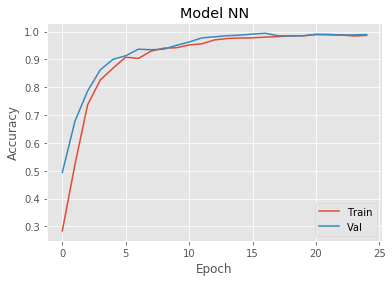

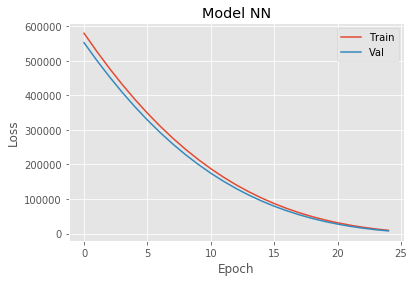

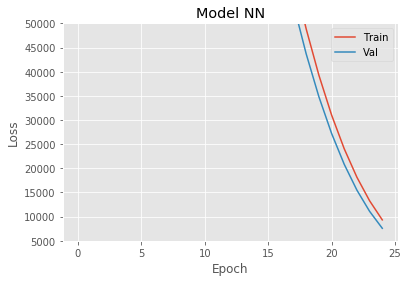

None


In [210]:
print(show_plot(hist))

In [199]:
tst = acc_predict(X_test, y_test)
tst

Predict            bananas  gala  golden  ...  plum  prickly  sultana
True                                      ...                        
bananas                 67     0       0  ...     0        0        0
gala                     0    20       0  ...     2        0        0
golden                   0     0      22  ...     0        0        0
granny_smith             0     0       0  ...     0        0        0
grape_black              0     0       0  ...     0        0        0
grapefruit_yellow        0     0       0  ...     0        0        0
lady_fingers             0     0       0  ...     0        0        1
lemon_yellow             0     0       0  ...     0        0        0
pepper_red               0     0       0  ...     0        0        0
pepper_yellow            0     0       0  ...     0        0        0
plum                     0     0       0  ...    46        0        0
prickly                  0     0       0  ...     0       67        0
sultana                  0     0       0  ...     0        0       52

[13 rows x 13 columns]

In [203]:
DIR_MODEL

'/content/drive/My Drive/Colab Notebooks/fresh/models'

In [202]:
save_model(model, DIR_MODEL, 'model2')

Saved model to disk.


In [0]:
load_model(model, DIR_MODEL, 'model')

In [0]:
i = np.random.randint(0, len(images))
x = images[i]
#img = Image.fromarray(x)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

fig=plt.figure(figsize=(30, 15))
columns = 8
rows = 5

i = 0
j = 0

for batch in datagen.flow(x, batch_size=1):
    img = Image.fromarray((batch[0] * 255.).astype(np.uint8))
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.imshow(img)
    i += 1
    if i + 1 > 40:
        break  # otherwise the generator would loop indefinitely
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.show()


In [143]:
df[df['Art'] == 'grapefruit_yellow'].head(5)

Gr0     Gr1  ...                 cl   type
2984  grapefruit  yellow  ...  grapefruit_yellow    VAL
2985  grapefruit  yellow  ...  grapefruit_yellow    VAL
2986  grapefruit  yellow  ...  grapefruit_yellow  TRAIN
2987  grapefruit  yellow  ...  grapefruit_yellow    VAL
2988  grapefruit  yellow  ...  grapefruit_yellow  TRAIN

[5 rows x 8 columns]

In [171]:
pd.crosstab(df['Gr1'],df['Art'])


Art      bananas  gala  golden  granny_smith  ...  pepper  plum  prickly  sultana
Gr1                                           ...                                
bananas      644     0       0             0  ...       0     0        0        0
black          0     0       0             0  ...       0     0        0        0
green          0     0     227           439  ...       0     0      604      549
red            0   274       0             0  ...     114   555        0        0
yellow         0     0       0             0  ...     174     0        0        0

[5 rows x 13 columns]

Saved model to disk


In [0]:
#file_test = '/content/drive/My Drive/20190919172120 945.png'
#file_test = '/content/drive/My Drive/20190919172138 911.png'
file_test = '/content/drive/My Drive/20190919172106 596.png'

img_test = np.array(Image.open(file_test).resize(SIZE_IMG))
img_test = images[5]
img_test = np.expand_dims(img_test, axis=0)
p =  model.predict(img_test)[0]
print(y.columns[p == max(p)][0])
Image.fromarray(img_test[0]*255, 'RGB')



In [204]:
y.columns


Index(['bananas', 'gala', 'golden', 'granny_smith', 'grape_black',
       'grapefruit_yellow', 'lady_fingers', 'lemon_yellow', 'pepper_red',
       'pepper_yellow', 'plum', 'prickly', 'sultana'],
      dtype='object')

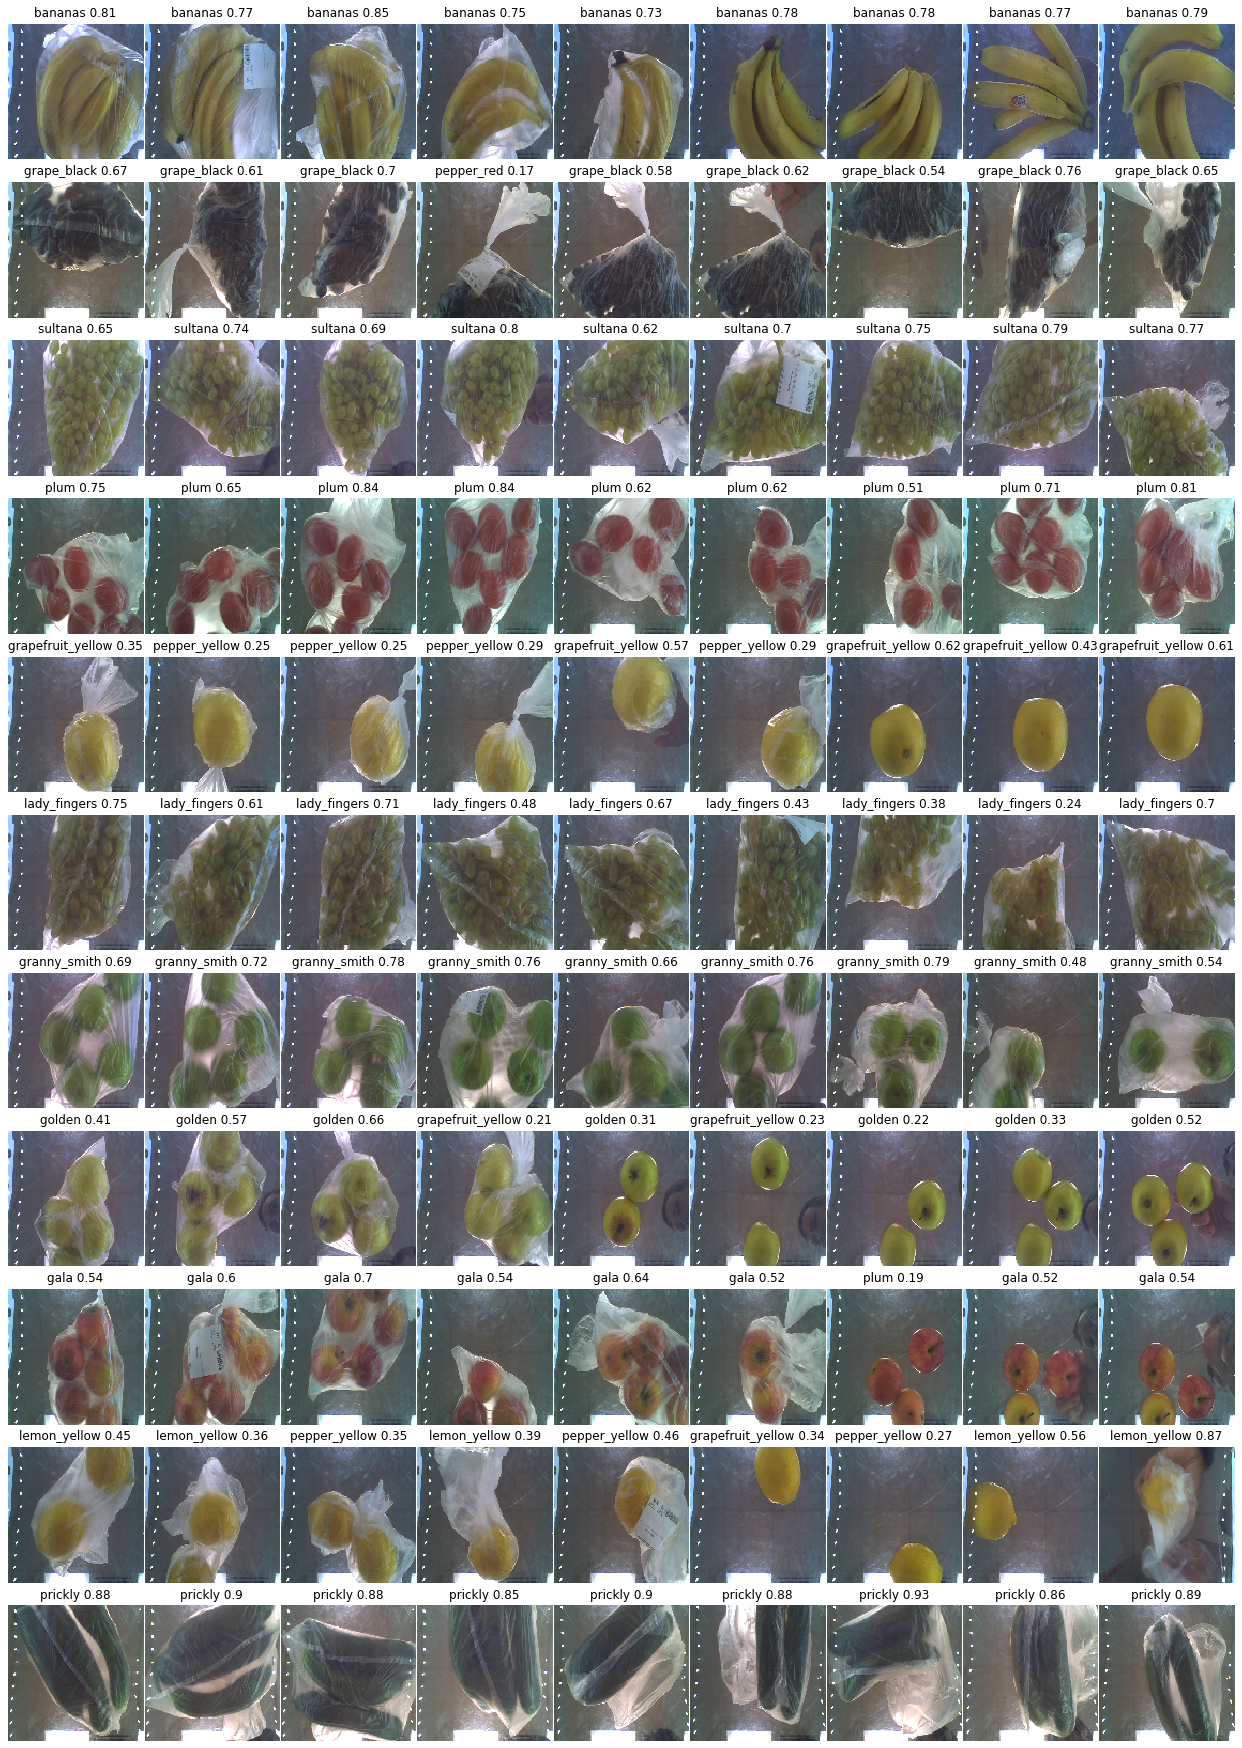

In [200]:
fig=plt.figure(figsize=(22, 32))
columns = 9
rows = 11
i = 0

for file_test in sorted(os.listdir(DIR_PHOTOS_TEST)):
    fig.add_subplot(rows, columns, i + 1)
    img_test = np.array(Image.open(DIR_PHOTOS_TEST+'/'+file_test).resize(SIZE_IMG))
    plt.imshow(img_test)
    img_test = img_test.reshape((1,) + img_test.shape) / 255
    p =  model.predict(img_test)[0]
    title = '{} {:.2}'.format(y.columns[p == max(p)][0], max(p))
    plt.title(title, fontsize=12)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    i+=1
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()